<a href="https://colab.research.google.com/github/Ana-AlonsoCanizares/AA_GRUPO3/blob/main/AA_PRACTICA1_GRUPO3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTAMOS KERAS
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
print(tf.keras.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))
print(tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.9.0
GPU Available: []
2.9.2


## DATOS

### Cargamos el dataset

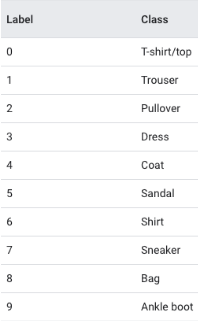

In [ ]:
# CARGAMOS EL CONJUNTO DE DATOS MNIST EN KERAS
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
print(train_images.shape)

(60000, 28, 28)


In [ ]:
# Vemos la matriz de la imagen número 0 (28x28)
import numpy as np
np.set_printoptions(precision=2, suppress=True, linewidth=145)
print(np.matrix(train_images[0]))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 22

In [ ]:
# La imagen anterior corresponde con la bota asociada al número 9. Hasta se puede intuir.... 
train_labels[0]

9

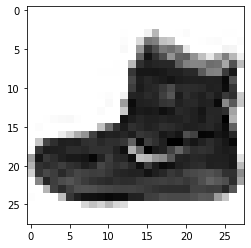

In [ ]:
# Veamos el elemento 0 y pintémoslo con matplotlib
import matplotlib.pyplot as plt
digit = train_images[0]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

### Preprocesamiento

In [ ]:
# PREPARAMOS LOS DATOS DE IMAGEN CON ALGUNA TRANSFORMACIÓN. NORMALIZACION
# Los tensores transformados tienen la misma cantidad de datos total que el 
# tensor inicial

# Imagenes de entrenamiento.
# train_images = train_images.reshape((60000, 28 * 28)) -> No es necesario pues utilizamos flatten layer
train_images = train_images.astype('float32') / 255
# Imagenes y etiquetas de test.
# test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [ ]:
# PREPARACIÓN LAS ETIQUETAS
from keras.utils.np_utils import to_categorical

# Guardamos variables sin categorizar para la variante del modelo 3, 
# donde usaremos la función de pérdida 'sparse_categorical_crossentropy'
train_labels_nc = train_labels
test_labels_nc = test_labels

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

##MODELOS

En esta sección se definen y entrenan cada uno de los 8 modelos que se estudian en esta práctica.

Para simplificar el archivo, se emparejan 2 a 2 los modelos que solo se diferencian en el paso de compilación

Nuestro problema de clasificación de prendas será **secuencial** y tendrá una salida con 10 clases correspondientes a los diez tipos de prendas, independientemente del resto de parámetros utilizados, los cuales iremos variando.

También, estarán formados por capas **densas**, donde todos los píxeles de entrada se introducen en todas las neuronas, y estas a su vez, conectadas con la de la salida.

La capa de salida estará formada por 10 neuronas y por la función de activación 'softmax' para que nos devuelva un vector de distribución de probabilidad sobre las clases que buscamos clasificar.

Predecimos, que en aquellos modelos en los que la capa de entrada contiene 10 neuronas, es decir, diez grados de libertad, serán insuficientes, pues hará un filtro desde el inicio provocando la pérdida de información al ser el número de neuronas tan limitado como el número de prendas a clasificar.

In [ ]:
# Librerías a utilizar para construir los modelos
from keras import models
from keras import layers

In [ ]:
# Definimos variables que van a contener los resultados de los entrenamientos
HISTORY = []
TEST_LOSS = []
TEST_ACC = []

### Modelo 1 y 2

In [ ]:
from keras.layers.reshaping.flatten import Flatten
# ARQUITECTURA DE LA RED
# La función "Flatten" realiza lo mismo que la función "reshape", es decir, 
# un tensor de, en este caso, 2D, lo redimensiona en un tensor de 1D

Modelo1 = models.Sequential()
Modelo1.add(layers.Flatten(input_shape=(28,28)))
Modelo1.add(layers.Dense(10, activation='relu'))
Modelo1.add(layers.Dense(10, activation='softmax'))

Modelo2 = models.Sequential()
Modelo2.add(layers.Flatten(input_shape=(28,28)))
Modelo2.add(layers.Dense(10, activation='relu'))
Modelo2.add(layers.Dense(10, activation='softmax'))

Modelo1.summary() # Summary de Modelo1 es igual que el de Modelo2, Modelo3, Modelo4
# Ya que el summary depende del número de pixeles de nuestra entrada
# Y del número de neuronas por capa (en este caso, 10).
# Nombre de las capas automáticos a no ser que lo definamos
# 7.850 = 784 x 10 + 10 Sesgo
# 110 = 10x10 + 10 Sesgo
# 7.960 = 7.850 + 110

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 784)               0         
                                                                 
 dense_26 (Dense)            (None, 10)                7850      
                                                                 
 dense_27 (Dense)            (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# COMPILACIÓN DE LOS MODELOS
Modelo1.compile(optimizer='sgd', # Optimizador 'sgd' (Stocastic Gradient Descendent)
                loss='categorical_crossentropy',
                metrics=['accuracy'])

Modelo2.compile(optimizer='rmsprop', # Optimizador 'rmsprop' (Stocastic Gradient Descendent)
                loss='categorical_crossentropy', # Función de pérdida
                metrics=['accuracy']) # Mética de Precisión

In [ ]:
# ENTRENAMOS EL MODELO 1 CON EL JUEGO DE DATOS DE ENTRENAMIENTO
history_M1 = Modelo1.fit(train_images, train_labels, epochs=5, batch_size=128)
HISTORY.append(history_M1)

Epoch 1/5
469/469 [==============================] - 1s 2ms/step - loss: 1.8515 - accuracy: 0.3540
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 1.3485 - accuracy: 0.5246
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 1.0805 - accuracy: 0.6216
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.9213 - accuracy: 0.6877
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.8057 - accuracy: 0.7379


Observando la métrica de precisión junto al valor de pérdida de este primer modelo obtenemos una salida que no es óptima, pues el valor de pérdida es muy alto y no es demasiado preciso.

In [ ]:
# ENTRENAMOS EL MODELO 2 CON EL JUEGO DE DATOS DE ENTRENAMIENTO
history_M2 = Modelo2.fit(train_images, train_labels, epochs=5, batch_size=128)
HISTORY.append(history_M2)

Epoch 1/5
469/469 [==============================] - 2s 2ms/step - loss: 1.0277 - accuracy: 0.6657
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.6009 - accuracy: 0.7999
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.5294 - accuracy: 0.8207
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.4894 - accuracy: 0.8328
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.4671 - accuracy: 0.8408


Este segundo modelo nos devuelve una precisión mayor y un valor de pérdida más bajo, por lo que podemos concluir que un mismo modelo con otro optimizador (de sgd a rmsprop) converge antes.

In [ ]:
# VERIFICAMOS NUESTRO MODELO YA ENTRENADO, CONTRA EL CONJUNTO DE PRUEBAS
print("\nModelo 1:")
M1_test_loss, M1_test_acc = Modelo1.evaluate(test_images, test_labels)
TEST_LOSS.append(M1_test_loss)
TEST_ACC.append(M1_test_acc)
print('test_loss:', M1_test_loss)
print('test_acc:', M1_test_acc)

print("\nModelo 2:")
M2_test_loss, M2_test_acc = Modelo2.evaluate(test_images, test_labels)
TEST_LOSS.append(M2_test_loss)
TEST_ACC.append(M2_test_acc)
print('test_loss:', M2_test_loss)
print('test_acc:', M2_test_acc)


Modelo 1:
313/313 [==============================] - 1s 2ms/step - loss: 0.7850 - accuracy: 0.7412
test_loss: 0.7849765419960022
test_acc: 0.7411999702453613

Modelo 2:
313/313 [==============================] - 1s 2ms/step - loss: 0.4827 - accuracy: 0.8349
test_loss: 0.4827178716659546
test_acc: 0.8349000215530396


Como hemos descrito previamente, al evaluar con los datos de test, obtenemos los resultados ya esperados.


### Modelo 3 y 4

In [ ]:
# CONSTRUIMOS LA SEGUNDA ARQUITECTURA DE LA RED
# El tipo de red será secuencial. Desde la entrada hasta la salida sin ciclos

Modelo3 = models.Sequential()
Modelo3.add(layers.Flatten(input_shape=(28,28)))
Modelo3.add(layers.Dense(10, activation='sigmoid', input_shape=(28*28,)))
Modelo3.add(layers.Dense(10, activation='softmax'))

Modelo4 = models.Sequential()
Modelo4.add(layers.Flatten(input_shape=(28,28)))
Modelo4.add(layers.Dense(10, activation='sigmoid', input_shape=(28*28,)))
Modelo4.add(layers.Dense(10, activation='softmax'))

Modelo3.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_14 (Flatten)        (None, 784)               0         
                                                                 
 dense_30 (Dense)            (None, 10)                7850      
                                                                 
 dense_31 (Dense)            (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# COMPILACIÓN DEL MODELO  
Modelo3.compile(optimizer='sgd', # Optimizador 'rmsprop' (Stocastic Gradient Descendent)
                loss='categorical_crossentropy', # Función de pérdida
                metrics=['accuracy']) # Mética de Precisión

Modelo4.compile(optimizer='rmsprop', # Optimizador 'rmsprop' (Stocastic Gradient Descendent)
                loss='categorical_crossentropy', # Función de pérdida
                metrics=['accuracy']) # Mética de Precisión

In [ ]:
# ENTRENAMOS EL MODELO 3 CON EL JUEGO DE DATOS DE ENTRENAMIENTO
history_M3 = Modelo3.fit(train_images, train_labels, epochs=5, batch_size=128)
HISTORY.append(history_M3)

Epoch 1/5
469/469 [==============================] - 1s 2ms/step - loss: 2.1896 - accuracy: 0.2353
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 1.9050 - accuracy: 0.5323
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 1.6914 - accuracy: 0.6178
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 1.5207 - accuracy: 0.6438
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 1.3820 - accuracy: 0.6585


El tercer modelo nos devuelve una pérdida mayor que 1 y una precisión de poco más del 60%.
Comparándolo con el modelo 1, es decir, cambiando la función de activación de relu a sigmoid la convergencia es más lenta, esto es debido a que 'sigmoid' tiene un uso limitado en la actualidad y además, se utiliza para clasificación binaria. https://www.codificandobits.com/blog/funcion-de-activacion/#la-funci%C3%B3n-sigmoidal-%CF%83

In [ ]:
# ENTRENAMOS EL MODELO 4 CON EL JUEGO DE DATOS DE ENTRENAMIENTO
history_M4 = Modelo4.fit(train_images, train_labels, epochs=5, batch_size=128)
HISTORY.append(history_M4)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 1.4316 - accuracy: 0.6474
Epoch 2/5
469/469 [==============================] - 2s 3ms/step - loss: 0.8358 - accuracy: 0.7704
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.6368 - accuracy: 0.8041
Epoch 4/5
469/469 [==============================] - 2s 5ms/step - loss: 0.5509 - accuracy: 0.8220
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.5056 - accuracy: 0.8329


Observamos que empeora frente al segundo caso por el mismo motivo descrito al pasar del modelo 1 al 3.

Sin embargo, resulta mejor que el primer modelo, se explicará más detalladamente en el apartado.

In [ ]:
# VERIFICAMOS NUESTRO MODELO YA ENTRENADO, CONTRA EL CONJUNTO DE PRUEBAS
print('\nModelo 3')
M3_test_loss, M3_test_acc = Modelo3.evaluate(test_images, test_labels)
TEST_LOSS.append(M3_test_loss)
TEST_ACC.append(M3_test_acc)
print('test_loss:', M3_test_loss)
print('test_acc:', M3_test_acc)

print('\nModelo 4')
M4_test_loss, M4_test_acc = Modelo4.evaluate(test_images, test_labels)
TEST_LOSS.append(M4_test_loss)
TEST_ACC.append(M4_test_acc)
print('test_loss:', M4_test_loss)
print('test_acc:', M4_test_acc)


Modelo 3
313/313 [==============================] - 1s 2ms/step - loss: 1.3294 - accuracy: 0.6553
test_loss: 1.329417109489441
test_acc: 0.6553000211715698

Modelo 4
313/313 [==============================] - 1s 2ms/step - loss: 0.5145 - accuracy: 0.8227
test_loss: 0.5144530534744263
test_acc: 0.822700023651123


### Modelo 5 y 6

In [ ]:
# CONSTRUIMOS LA SEGUNDA ARQUITECTURA DE LA RED
# El tipo de red será secuencial. Desde la entrada hasta la salida sin ciclos
Modelo5 = models.Sequential()
Modelo5.add(layers.Flatten(input_shape=(28,28)))
Modelo5.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
Modelo5.add(layers.Dense(10, activation='softmax'))

Modelo6 = models.Sequential()
Modelo6.add(layers.Flatten(input_shape=(28,28)))
Modelo6.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
Modelo6.add(layers.Dense(10, activation='softmax'))

Modelo5.summary()# Summary de Modelo5 es igual que el de Modelo6, Modelo7, Modelo8
# Ya que el summary depende del número de pixeles de nuestra entrada
# Y del número de neuronas por capa (en este caso, 512).
# Nombre de las capas automáticos a no ser que lo definamos
# 401.920 = 784 x 512 + 512 Sesgo
# 5.130 = 512x10 + 10 Sesgo
# 407.050 = 401.920 + 5.130

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_16 (Flatten)        (None, 784)               0         
                                                                 
 dense_34 (Dense)            (None, 512)               401920    
                                                                 
 dense_35 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# COMPILACIÓN DE LOS MODELOS
Modelo5.compile(optimizer='sgd', # Optimizador 'sgd' (Stocastic Gradient Descendent)
                loss='categorical_crossentropy',
                metrics=['accuracy'])

Modelo6.compile(optimizer='rmsprop', # Optimizador 'rmsprop' (Stocastic Gradient Descendent)
                loss='categorical_crossentropy', # Función de pérdida
                metrics=['accuracy']) # Mética de Precisión

In [ ]:
# ENTRENAMOS EL MODELO 5 CON EL JUEGO DE DATOS DE ENTRENAMIENTO
history_M5 = Modelo5.fit(train_images, train_labels, epochs=5, batch_size=128)
HISTORY.append(history_M5)

Epoch 1/5
469/469 [==============================] - 5s 9ms/step - loss: 1.0135 - accuracy: 0.6975
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.6566 - accuracy: 0.7919
Epoch 3/5
469/469 [==============================] - 3s 7ms/step - loss: 0.5807 - accuracy: 0.8121
Epoch 4/5
469/469 [==============================] - 3s 7ms/step - loss: 0.5402 - accuracy: 0.8225
Epoch 5/5
469/469 [==============================] - 3s 7ms/step - loss: 0.5136 - accuracy: 0.8298


In [ ]:
# ENTRENAMOS EL MODELO 6 CON EL JUEGO DE DATOS DE ENTRENAMIENTO
history_M6 = Modelo6.fit(train_images, train_labels, epochs=5, batch_size=128)
HISTORY.append(history_M6)

Epoch 1/5
469/469 [==============================] - 5s 10ms/step - loss: 0.5568 - accuracy: 0.8012
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.3808 - accuracy: 0.8612
Epoch 3/5
469/469 [==============================] - 5s 10ms/step - loss: 0.3357 - accuracy: 0.8773
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.3094 - accuracy: 0.8868
Epoch 5/5
469/469 [==============================] - 5s 10ms/step - loss: 0.2916 - accuracy: 0.8905


In [ ]:
# VERIFICAMOS NUESTRO MODELO YA ENTRENADO, CONTRA EL CONJUNTO DE PRUEBAS
print('\nModelo 5')
M5_test_loss, M5_test_acc = Modelo5.evaluate(test_images, test_labels)
TEST_LOSS.append(M5_test_loss)
TEST_ACC.append(M5_test_acc)
print('test_loss:', M5_test_loss)
print('test_acc:', M5_test_acc)

print('\nModelo 6')
M6_test_loss, M6_test_acc = Modelo6.evaluate(test_images, test_labels)
TEST_LOSS.append(M6_test_loss)
TEST_ACC.append(M6_test_acc)
print('test_loss:', M6_test_loss)
print('test_acc:', M6_test_acc)


Modelo 5
313/313 [==============================] - 1s 3ms/step - loss: 0.5295 - accuracy: 0.8202
test_loss: 0.5294947624206543
test_acc: 0.8202000260353088

Modelo 6
313/313 [==============================] - 1s 3ms/step - loss: 0.3595 - accuracy: 0.8733
test_loss: 0.35949569940567017
test_acc: 0.8733000159263611


### Modelo 7 y 8

In [ ]:
# CONSTRUIMOS LA SEGUNDA ARQUITECTURA DE LA RED
# El tipo de red será secuencial. Desde la entrada hasta la salida sin ciclos
Modelo7 = models.Sequential()
Modelo7.add(layers.Flatten(input_shape=(28,28)))
Modelo7.add(layers.Dense(512, activation='sigmoid', input_shape=(28*28,)))
Modelo7.add(layers.Dense(10, activation='softmax'))

Modelo8 = models.Sequential()
Modelo8.add(layers.Flatten(input_shape=(28,28)))
Modelo8.add(layers.Dense(512, activation='sigmoid', input_shape=(28*28,)))
Modelo8.add(layers.Dense(10, activation='softmax'))

Modelo7.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_18 (Flatten)        (None, 784)               0         
                                                                 
 dense_38 (Dense)            (None, 512)               401920    
                                                                 
 dense_39 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# COMPILACIÓN DEL MODELO  
Modelo7.compile(optimizer='sgd', # Optimizador 'rmsprop' (Stocastic Gradient Descendent)
                loss='categorical_crossentropy', # Función de pérdida
                metrics=['accuracy']) # Mética de Precisión

Modelo8.compile(optimizer='rmsprop', # Optimizador 'rmsprop' (Stocastic Gradient Descendent)
                loss='categorical_crossentropy', # Función de pérdida
                metrics=['accuracy']) # Mética de Precisión

In [ ]:
# ENTRENAMOS EL MODELO 7 CON EL JUEGO DE DATOS DE ENTRENAMIENTO
history_M7 = Modelo7.fit(train_images, train_labels, epochs=5, batch_size=128)
HISTORY.append(history_M7)

Epoch 1/5
469/469 [==============================] - 4s 8ms/step - loss: 1.7166 - accuracy: 0.5841
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 1.1326 - accuracy: 0.7116
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 0.9243 - accuracy: 0.7337
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.8211 - accuracy: 0.7453
Epoch 5/5
469/469 [==============================] - 4s 8ms/step - loss: 0.7589 - accuracy: 0.7541


In [ ]:
# ENTRENAMOS EL MODELO 8 CON EL JUEGO DE DATOS DE ENTRENAMIENTO
history_M8 = Modelo8.fit(train_images, train_labels, epochs=5, batch_size=128)
HISTORY.append(history_M8)

Epoch 1/5
469/469 [==============================] - 5s 10ms/step - loss: 0.5931 - accuracy: 0.7905
Epoch 2/5
385/469 [=======================>......] - ETA: 0s - loss: 0.4315 - accuracy: 0.8437

In [ ]:
# VERIFICAMOS NUESTRO MODELO YA ENTRENADO, CONTRA EL CONJUNTO DE PRUEBAS
print('\nModelo 7')
M7_test_loss, M7_test_acc = Modelo7.evaluate(test_images, test_labels)
TEST_LOSS.append(M7_test_loss)
TEST_ACC.append(M7_test_acc)
print('test_loss:', M7_test_loss)
print('test_acc:', M7_test_acc)

print('\nModelo 8')
M8_test_loss, M8_test_acc = Modelo8.evaluate(test_images, test_labels)
TEST_LOSS.append(M8_test_loss)
TEST_ACC.append(M8_test_acc)
print('test_loss:', M8_test_loss)
print('test_acc:', M8_test_acc)


Modelo 7
313/313 [==============================] - 1s 3ms/step - loss: 0.7490 - accuracy: 0.7515
test_loss: 0.7490320801734924
test_acc: 0.7515000104904175

Modelo 8
313/313 [==============================] - 1s 3ms/step - loss: 0.3834 - accuracy: 0.8613
test_loss: 0.38341957330703735
test_acc: 0.861299991607666


### Variantes

En esta subsección se estudian 3 diferentes variantes de los modelos entrenados, concretamente se realizarán variaciones en los modelos 2, 3 y 7. Es importante apuntar que los modelos tendrán que ser definididos y compilados de nuevo, pues de lo contrario estaremos reentrando los modelos ya entrenados en las secciones anteriores. 

Dado que en algunas variantes el número de épocas incrementa considerablemente, realizaremos una partición del conjunto de datos de entrenamiento que utilizaremos para evaluar los resultados en cada época. De esta manera podremos comprobar si se produce sobre entrenamiento (*overfitting*) o infra entrenamiento (*underfitting*)

Como contamos con muchas imágenes de entrenamiento (60000), bstará con utilizar un 15% de estas para ralizar la validación, esto son 9000 imágenes. Además, el conjunto de datos ya viene desordenado (*shuffled*) por lo que no es necesario realizarlo de nuevo.

In [ ]:
#Partición del conjunto de datos de entrenamiento
split = 0.15

index = int(len(train_images) * 0.15) # índice a partir del cual se realiza la partición

# Partición imágenes
train_val = train_images[:index]
train_train = train_images[index:]

# Partición etiquetas one-hot encoded
train_labels_val = train_labels[:index]
train_train_labels = train_labels[index:]

# Partición etiquetas integers
train_labels_val_nc = train_labels_nc[:index]
train_train_labels_nc = train_labels_nc[index:]

#### Variante Modelo 2

En esta variante del modelo 2 se entrena la red neuronal con 25 épocas de entrenamiento en vez de 5. El resto de hiperparámetros y la arquitectura de la red permanecen iguales

In [ ]:
# CONSTRUIMOS LA ARQUITECTURA DE LA VARIANTE DEL MODELO 2
# El tipo de red será secuencial. Desde la entrada hasta la salida sin ciclos
Modelo2_variante = models.Sequential()
Modelo2_variante.add(layers.Flatten(input_shape=(28,28)))
Modelo2_variante.add(layers.Dense(512, activation='sigmoid', input_shape=(28*28,)))
Modelo2_variante.add(layers.Dense(10, activation='softmax'))

In [ ]:
# COMPILACIÓN DEL MODELO  
Modelo2_variante.compile(optimizer='rmsprop', # Optimizador 'rmsprop' (Stocastic Gradient Descendent)
                         loss='categorical_crossentropy', # Función de pérdida
                         metrics=['accuracy']) # Mética de Precisión

Vamos a entrenar nuestro modelo multiplicando el número de épocas por 5 (25).
Para ello, vamos a ir validando mientras vamos entrenando para ver en que punto el modelo comienza a sobreentrenarse.

In [ ]:
# ENTRENAMOS EL MODELO 2 CON EL JUEGO DE DATOS DE ENTRENAMIENTO
history_M2_variante = Modelo2_variante.fit(train_train, 
                                           train_train_labels, 
                                           epochs=25, 
                                           batch_size=128,
                                           validation_data = (train_val, train_labels_val))
HISTORY.append(history_M2_variante)

In [ ]:
# VERIFICAMOS NUESTRO MODELO YA ENTRENADO, CONTRA EL CONJUNTO DE PRUEBAS
print('\nVariante Modelo 2')
Variante_M2_test_loss, Variante_M2_test_acc = Modelo2_variante.evaluate(test_images, test_labels)
TEST_LOSS.append(Variante_M2_test_loss)
TEST_ACC.append(Variante_M2_test_acc)
print('test_loss:', Variante_M2_test_loss)
print('test_acc:', Variante_M2_test_acc)

In [ ]:
import matplotlib.pyplot as plt

acc = history_M2_variante.history['accuracy']
val_acc = history_M2_variante.history['val_accuracy']
loss = history_M2_variante.history['loss']
val_loss = history_M2_variante.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" es para "punto azun"
plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')
# "b" es para "linea continua azul"
plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
plt.title('Pérdida de Entrenamiento y Validación')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
# "bo" es para "punto azun"
plt.plot(epochs, acc, 'bo', label='Precisión de Entrenamiento')
# "b" es para "linea continua azul"
plt.plot(epochs, val_acc, 'b', label='Precisión de Validación')
plt.title('Precisión de Entrenamiento y Validación')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

#### Variante Modelo 3

En esta variante del Modelo 3 se modifica el optimizador, que ahora pasa a ser `Adam` en defecto de `rmsprop`, y también se modificará la función de pérdida, la cual pasará a ser `sparse_categorical_crossentropy`. 

El optimizador Adam (Adaptive moment estimation) es el método de optimización más utilizado en la actualidad ya que combina RMSProp, utilizado en otros modelos en esta práctica y AdaGrad (Adaptive Gradient Algorithm), entonces podemos pensar que va a obtener mejores resultados si hacemos esta modificación en el modelo 3, a continuación lo veremos. 
Adam, encuentra el nivel de aprendizaje individual para cada parámetro porque calcula una combinación lineal entre el gradiente y el incremento anterior y considera los gradientes recientemente obtenidos para ello.

En esta variante como se realizan solo 5 épocas de entrenamiento no es necesario utilizar la partición entrenamiento-validación (*train-validation*)

In [ ]:
# CONSTRUIMOS LA ARQUITECTURA DE LA VARIANTE DEL MODELO 3
# El tipo de red será secuencial. Desde la entrada hasta la salida sin ciclos
Modelo_M3_variante = models.Sequential()
Modelo_M3_variante.add(layers.Flatten(input_shape=(28,28)))
Modelo_M3_variante.add(layers.Dense(10, activation='sigmoid', input_shape=(28*28,)))
Modelo_M3_variante.add(layers.Dense(10, activation='softmax'))

In [ ]:
# HACEMOS EL PASO DE COMPILACIÓN CARGANDO EL  OPTIMIZADOR, LA FUNCIÓN DE PÉRDIDA Y LAS MÉTRICAS
Modelo_M3_variante.compile(optimizer='adam',           # Optimizador 'adam' (Adaptive moment estimation)
                loss='sparse_categorical_crossentropy', # Función de pérdida
                metrics=['accuracy'])                   # Mética de Precisión

In [ ]:
# ENTRENAMOS EL MODELO 3 CON EL JUEGO DE DATOS DE ENTRENAMIENTO
history_M3_variante = Modelo_M3_variante.fit(train_images, 
                                             train_labels_nc, 
                                             epochs=5, 
                                             batch_size=128)
HISTORY.append(history_M3_variante)

In [ ]:
# VERIFICAMOS NUESTRO MODELO YA ENTRENADO, CONTRA EL CONJUNTO DE PRUEBAS
print('\nVariante Modelo 3')
Variante_M3_test_loss, Variante_M3_test_acc = Modelo_M3_variante.evaluate(test_images, test_labels_nc)
TEST_LOSS.append(Variante_M3_test_loss)
TEST_ACC.append(Variante_M3_test_acc)
print('test_loss:', Variante_M3_test_loss)
print('test_acc:', Variante_M3_test_acc)

#### Variante Modelo 7

La última de las variantes sigue las mismas modificaciones que la variante del modelo 2, donde se multiplica el número de épocas que pasa de `5` a `25`. En este caso, al igual que con la variante 2 utilizaremos la partición entrenamiento-validación.

In [ ]:
# CONSTRUIMOS LA ARQUITECTURA DE LA VARIANTE DEL MODELO 7
# El tipo de red será secuencial. Desde la entrada hasta la salida sin ciclos
Modelo_M7_variante = models.Sequential()
Modelo_M7_variante.add(layers.Flatten(input_shape=(28,28)))
Modelo_M7_variante.add(layers.Dense(512, activation='sigmoid', input_shape=(28*28,)))
Modelo_M7_variante.add(layers.Dense(10, activation='softmax'))

In [ ]:
# COMPILACIÓN DEL MODELO  
Modelo_M7_variante.compile(optimizer='sgd', # Optimizador 'rmsprop' (Stocastic Gradient Descendent)
                loss='categorical_crossentropy', # Función de pérdida
                metrics=['accuracy']) # Mética de Precisión

In [ ]:
# ENTRENAMOS EL MODELO 7 CON EL JUEGO DE DATOS DE ENTRENAMIENTO
history_M7_variante = Modelo_M7_variante.fit(train_train, 
                                           train_train_labels, 
                                           epochs=25, 
                                           batch_size=128,
                                           validation_data = (train_val, train_labels_val))
HISTORY.append(history_M7_variante)

In [ ]:
# VERIFICAMOS NUESTRO MODELO YA ENTRENADO, CONTRA EL CONJUNTO DE PRUEBAS
print('\nVariante Modelo 7')
Variante_M7_test_loss, Variante_M7_test_acc = Modelo_M7_variante.evaluate(test_images, test_labels)
TEST_LOSS.append(Variante_M7_test_loss)
TEST_ACC.append(Variante_M7_test_acc)
print('test_loss:', Variante_M7_test_loss)
print('test_acc:', Variante_M7_test_acc)


Variante Modelo 7
313/313 [==============================] - 1s 3ms/step - loss: 0.5475 - accuracy: 0.8066
test_loss: 0.5475404262542725
test_acc: 0.8065999746322632


## RESULTADOS

In [ ]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools

### Funciones para graficar

In [ ]:
# Curvas de aprendizaje
"""
Notas: Los elementos de HISTORY son diccionarios que contienen los nombres de las métricas como claves 
y sus valores (.values()) son listas con los valores de las métricas durante el entrenamiento model.fit
"""
def curvas_aprendizaje(HISTORY, nfilas, ncol, size = (18,10), title = []):
    # Función para imprimir las curvas de aprendizaje en una rejilla de nfilas x ncol
    # Argumentos: HISTORY = Lista con variables history de keras (obtenidas de model.fit)
    #        nfilas, ncol = Nº de filas y columnas de la rejilla
    #                size = Tamaño total de la rejilla (por defecto es (18,10))
    # !Importante: El nº total de filas x col debe ser superiror al de los elementos pasados como argumento en HISTORY
    if len(HISTORY) > nfilas*ncol:
        print("Error. Dimensiones incompatibles")
        return 0
    else:
        fig = plt.figure(figsize=size) # Especifica tamaño de la figura

        for i, registro in enumerate(HISTORY):

            plt.subplot(nfilas, ncol, i+1) # Añade subplot (gráfica para un modelo)
            if title:
              plt.title(title[i])
            else:
              plt.title("Modelo " + str(i+1)) # Formato de cada gráfica
            plt.xlabel('Épocas')
            plt.ylim((0,2))

            acc = registro.history['accuracy']
            loss = registro.history['loss']

            x = list(range(1, len(acc) + 1))

            plt.plot(x,loss, 'o-') # Imprime 
            plt.plot(x, acc, 'o-')

            plt.xticks(x)
            plt.legend(list(registro.history.keys()))
            plt.text(len(x), loss[len(loss)-1], str(round(loss[len(loss)-1],3))) # Valor punto final  loss
            plt.text(len(x), acc[len(acc)-1], str(round(acc[len(acc)-1],3))) # Valor punto final  loss

    fig.tight_layout()
    plt.show()


# Entrenamiento-validacion
def entrenamiento_validacion(HISTORY, nfilas, ncol, title, size = (18,10)):
  if len(HISTORY) < nfilas*ncol:
    print("Error. Dimensiones incompatibles")
    return 0
  else:
    fig = plt.figure(figsize=size) # Especifica tamaño de la figura

  for i, history in enumerate(HISTORY):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.subplot(nfilas, ncol, i+1)

    # "bo" es para "punto azun"
    plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')
    # "b" es para "linea continua azul"
    plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
    plt.title(title[i])
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

  plt.show()



# Confusion Matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

def show_confusion_matrix(predictions):
    # Predicción de valores desde el dataset de validación
    Y_pred = predictions
    # Convertir en predicciones de clases desde los vectores one-hot encoding 
    Y_pred_classes = np.argmax(Y_pred, axis = 1) 
    # Convertir en clases de observación desde los vectores one-hot encoding
    Y_true = np.argmax(test_labels, axis = 1) 
    # Computar la matriz de confusión
    confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
    # Dibujar la matriz de confusión
    plot_confusion_matrix(confusion_mtx, classes = range(10))

# Prediction distributions
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)    

    predicted_label = np.argmax(predictions_array)
    if predicted_label.all() == true_label.all():
      color = 'blue'
    else:
      color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                  100*np.max(predictions_array),
                                  true_label),
                                  color=color)


def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('black')

def show_predicted_distributions(predictions, n):
    Y_true = np.argmax(test_labels, axis = 1)
    for i in range(n):
      plt.figure(figsize=(6,3))
      plt.subplot(1,2,1)
      plot_image(i, predictions[i], Y_true, test_images.reshape(10000,28,28))
      plt.subplot(1,2,2)
      plot_value_array(i, predictions[i],  Y_true)
      plt.show()
      plt.clf()

def show_single_predicted_dist(predictions, i, title):
      Y_true = np.argmax(test_labels, axis = 1)
      plt.figure(figsize=(6,3))
      plt.subplot(1,2,1)
      plot_image(i, predictions[i], Y_true, test_images.reshape(10000,28,28))
      plt.subplot(1,2,2)
      plot_value_array(i, predictions[i],  Y_true)

      plt.title(title)
      plt.tight_layout()
      plt.show()



# Gráfico de barras horizontales
def testerror_testacc(ERROR, ACC, titles, size = (12,12)):
    fig = plt.figure(figsize=size) # Especifica tamaño de la figura

    # Ordena pérdida en orden ascendente y precisión en orden descendente
    sorted_err = dict(zip(titles, ERROR))
    sorted_err = dict(sorted(sorted_err.items(), key = lambda x: x[1], reverse=True)) 

    sorted_acc = dict(zip(titles, ACC))
    sorted_acc = dict(sorted(sorted_acc.items(), key = lambda x: x[1])) 

    # Gráfica
    plt.subplot(1, 2, 1)
    plt.barh(list(sorted_err.keys()), list(sorted_err.values()))
    plt.title('Test error')

    plt.subplot(1,2,2)
    plt.barh(list(sorted_acc.keys()), list(sorted_acc.values()), color='orange')
    plt.title('Test accuracy')

    fig.tight_layout()
    plt.show()

### Curvas de aprendizaje

**Modelos 1 al 8**

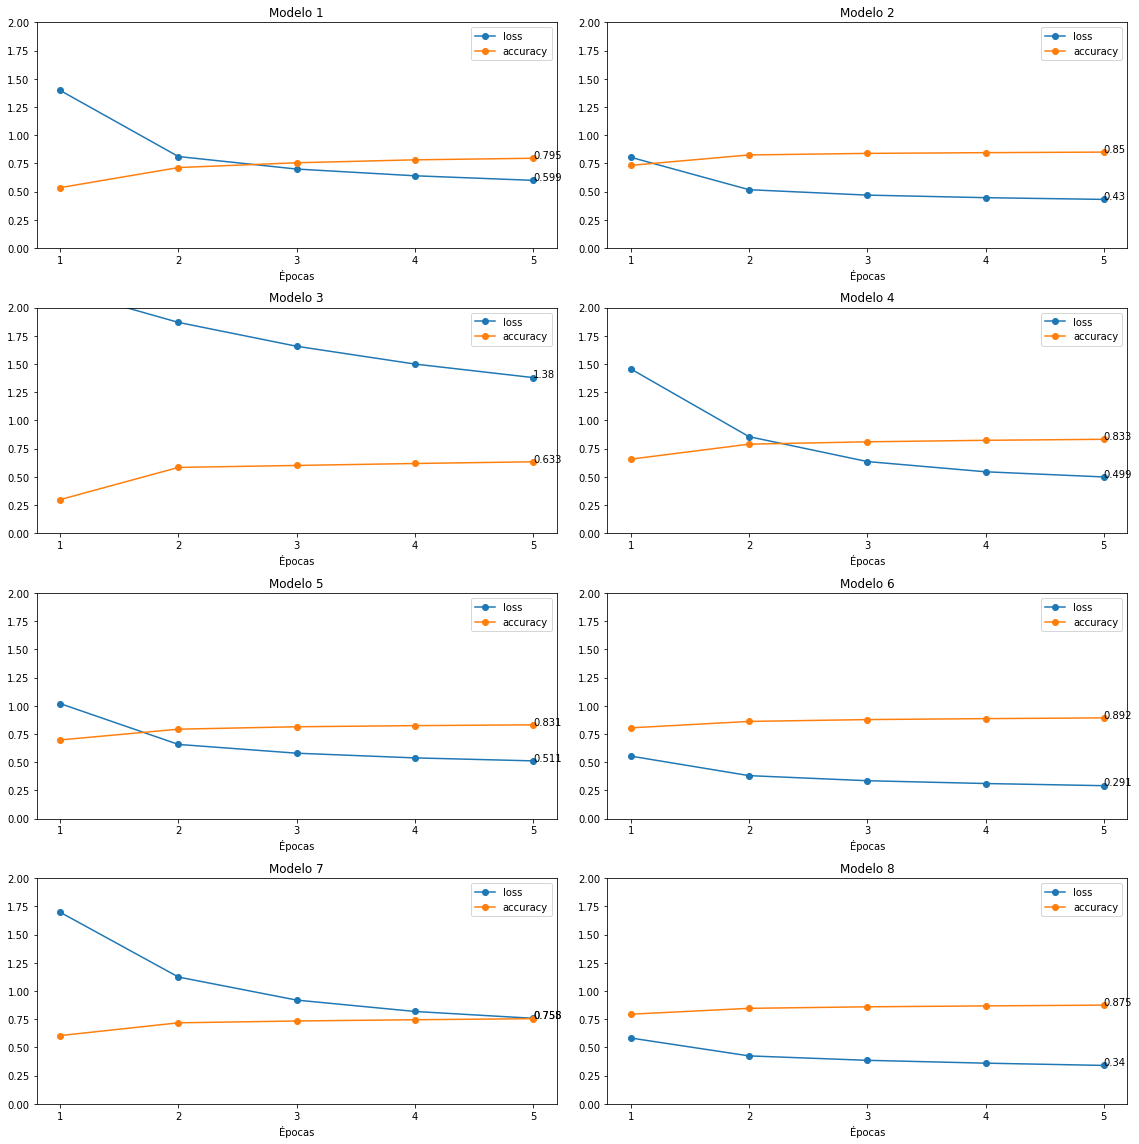

In [ ]:
# Plot con las curvas de aprendizaje obtenidas a partir de la lista HISTORY (ver función en apartado Funciones para graficar)
curvas_aprendizaje(HISTORY[:8], 4, 2, (16,16))

Conclusiones de las curvas de aprendiaje 

Después de observar el entrenamiento de todos los modelos y comparar los parámetros de pérdida y precisión, podemos decir que el mejor modelo es el 6, obteniendo menos de un 30% de pérdida y un 89% de precisión.
En cambio el peor modelo es el 3, debido al gran porcentaje de pérdida y la baja precisión obtenida, entorno al 65%. Además, entre estos dos modelos hay una gran diferencia de neuronas en la capa de entrada por lo que se puede esperar que uno de los modelos con 512 neuronas sea uno de los mejores frente a los que tienen 10 neuronas como es por ejemplo el 3. La función de activación en ambos modelos es la misma pero en cambio el optimizador no, por lo que podemos concluir que la combinación de sigmoid con sgd frente a sigmoid con rmsprop obtiene peores resultados. De hecho un ejemplo de ello es el modelo 7, que es la misma combinación que en el 3 en cuánto a función de activación y optimizador  y obtenemos unos altos porcentajes de pérdida llegando al 75%.

**Variantes**

En el caso de las variantes de los modelos 2 y 7 comprobaremos si se ha producido sobre entrenamiento (*overfitting*) o infra entrenamiento (*underfitting*).

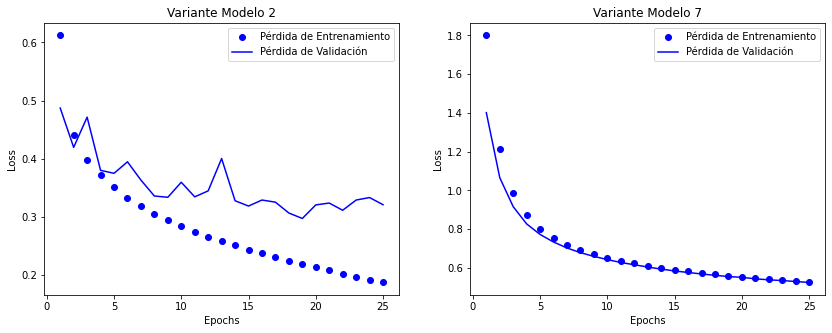

In [ ]:
entrenamiento_validacion([HISTORY[8], HISTORY[10]], 1, 2, ["Variante Modelo 2", "Variante Modelo 7"], (14, 5))

Conclusiones

Ahora pasamos a comprobar los datos de pérdida y precisión (en el conjunto de dato de entrenamiento) de las 3 variantes

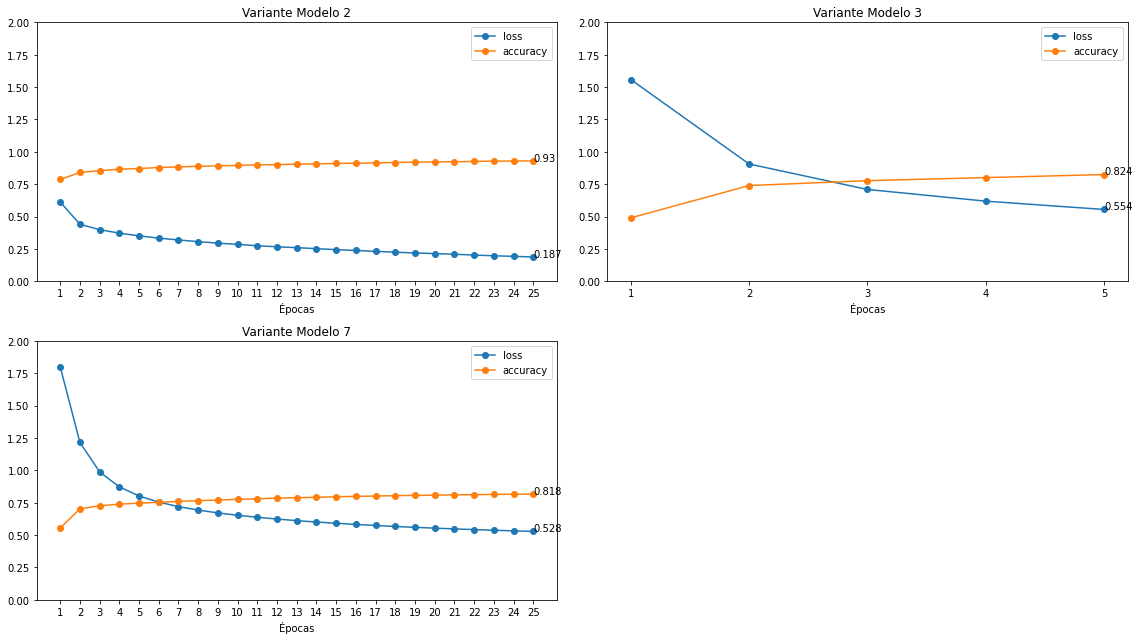

In [ ]:
curvas_aprendizaje(HISTORY[8:], 2, 2, (16,9), title = ['Variante Modelo 2', 'Variante Modelo 3', 'Variante Modelo 7'])

En el caso de los modelos 2 y 7 aumentando hasta 25 el número de iteraciones:

Recordamos que en el modelo 2 inicial con 5 iteraciones obtenía un resultado en los datos de entrenamiento de entorno al 46% de pérdida y un 84% de precisión, en cambio con esta variación de épocas, obtenemos una mejora de hasta 10% de precisión y mejoramos la pérdida en un 30%.

Por otro lado en el modelo 7, con el aumento de iteraciones obtenemos una mejora de un 20% en la pérdida y en la precisión de un 6%.

En el modelo 3, cambiando el optimizador de sgd a adam, es asombroso como la pérdida mejora más de 70% y obtenemos más precisión llegando al 83% lo que supone una mejora de casi un 20%.

### Matrices de confusión

En este apartado observamos los tipos de predicciones (correctas e incorrectas) que realizan nuestros 8 modelos distintos. Para ello, tenemos en cuenta la matriz de confusión donde podemos ver los VP (verdaderos positivos), VN (verdaderos negativos), FP (falsos positivos), FN (falsos negativos). En la siguiente tabla entendemos mejor como funcionaría esto para un modelo de clasificación binaria:

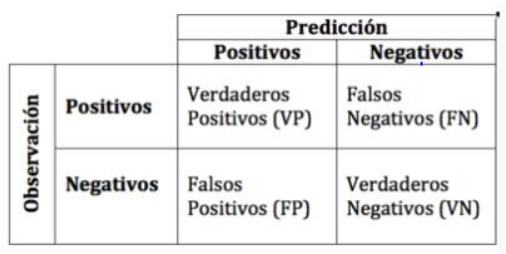

In [ ]:
# Predicciones de los modelos en el conjunto de datos de entrenamiento
predictions1 = Modelo1.predict(test_images)
predictions2 = Modelo2.predict(test_images) 
predictions3 = Modelo3.predict(test_images)
predictions4 = Modelo4.predict(test_images) 
predictions5 = Modelo5.predict(test_images)
predictions6 = Modelo6.predict(test_images) 
predictions7 = Modelo7.predict(test_images)
predictions8 = Modelo8.predict(test_images) 

313/313 [==============================] - 1s 3ms/step


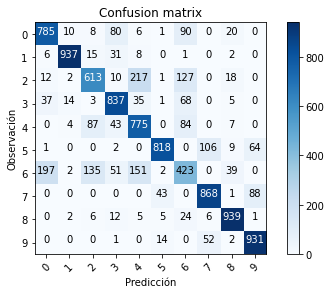

In [ ]:
# Modelo 1
show_confusion_matrix(predictions1)

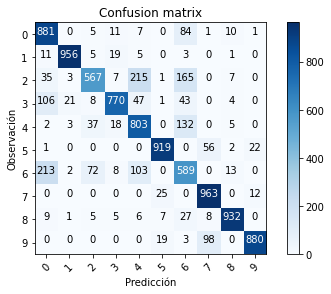

In [ ]:
# Modelo 2
show_confusion_matrix(predictions2)

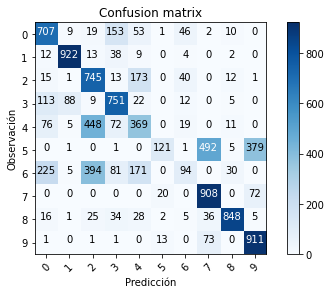

In [ ]:
# Modelo 3
show_confusion_matrix(predictions3)

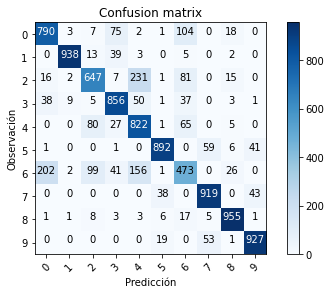

In [ ]:
# Modelo 4
show_confusion_matrix(predictions4)

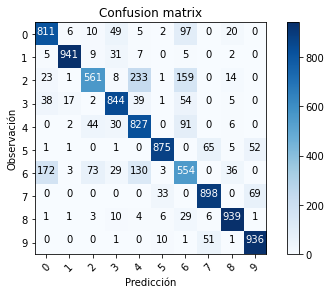

In [ ]:
# Modelo 5
show_confusion_matrix(predictions5)

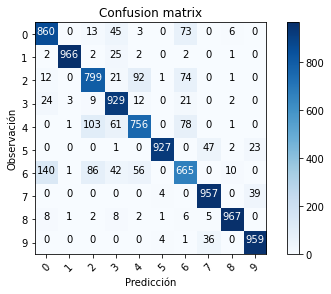

In [ ]:
# Modelo 6
show_confusion_matrix(predictions6)

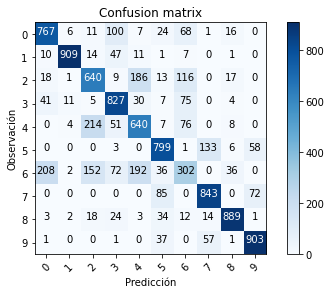

In [ ]:
# Modelo 7
show_confusion_matrix(predictions7)

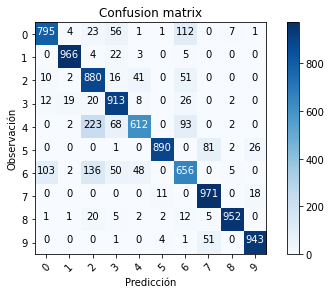

In [ ]:
# Modelo 8
show_confusion_matrix(predictions8)

### Distribución de predicciones

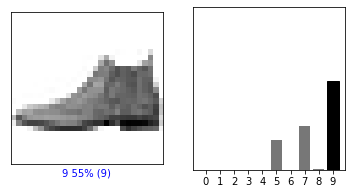

<Figure size 432x288 with 0 Axes>

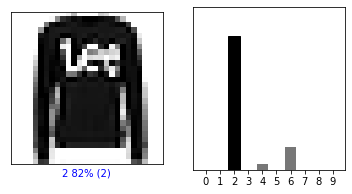

<Figure size 432x288 with 0 Axes>

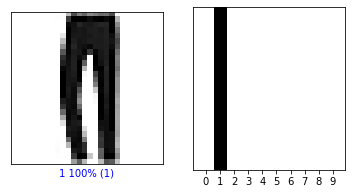

<Figure size 432x288 with 0 Axes>

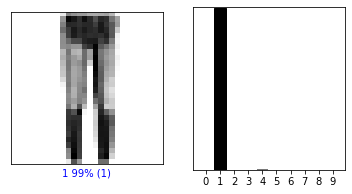

<Figure size 432x288 with 0 Axes>

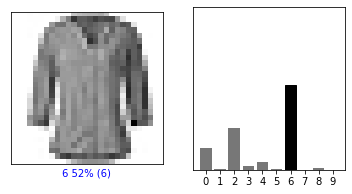

<Figure size 432x288 with 0 Axes>

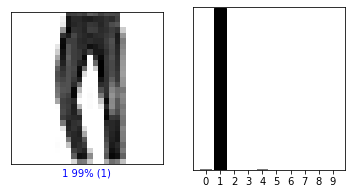

<Figure size 432x288 with 0 Axes>

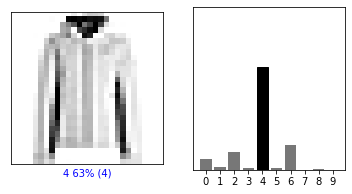

<Figure size 432x288 with 0 Axes>

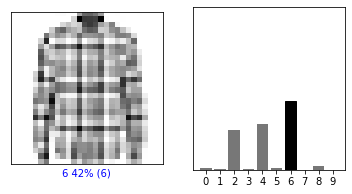

<Figure size 432x288 with 0 Axes>

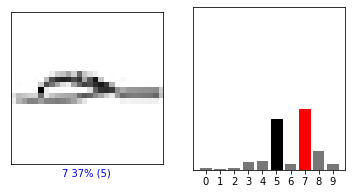

<Figure size 432x288 with 0 Axes>

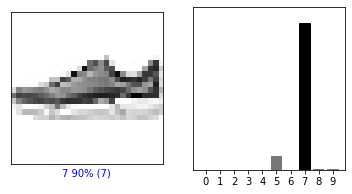

<Figure size 432x288 with 0 Axes>

In [ ]:
# Predicciones de las 10 primeras imagenes de test
# Modelo 1
show_predicted_distributions(predictions1, 10)

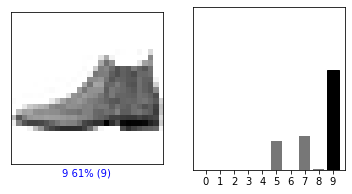

<Figure size 432x288 with 0 Axes>

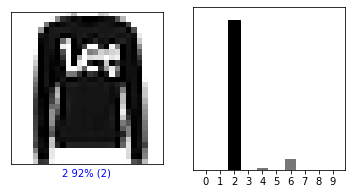

<Figure size 432x288 with 0 Axes>

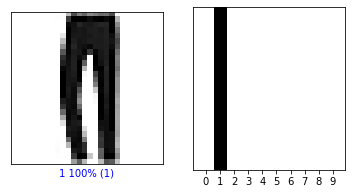

<Figure size 432x288 with 0 Axes>

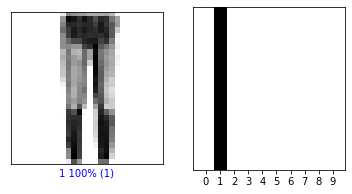

<Figure size 432x288 with 0 Axes>

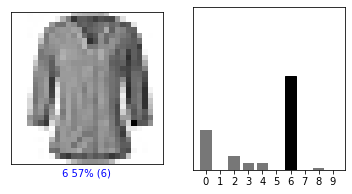

<Figure size 432x288 with 0 Axes>

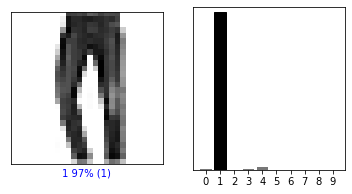

<Figure size 432x288 with 0 Axes>

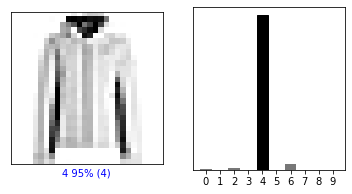

<Figure size 432x288 with 0 Axes>

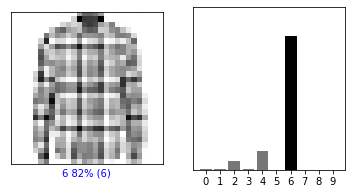

<Figure size 432x288 with 0 Axes>

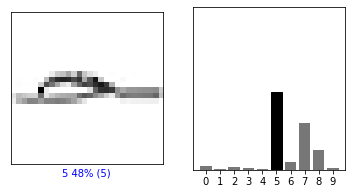

<Figure size 432x288 with 0 Axes>

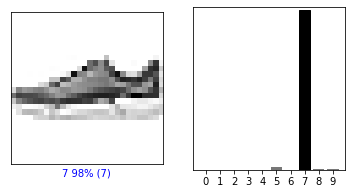

<Figure size 432x288 with 0 Axes>

In [ ]:
# Modelo 2
show_predicted_distributions(predictions2, 10)

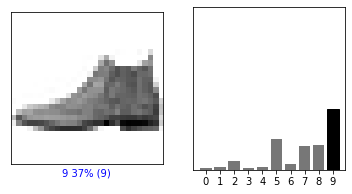

<Figure size 432x288 with 0 Axes>

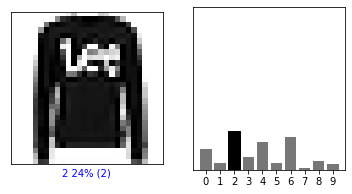

<Figure size 432x288 with 0 Axes>

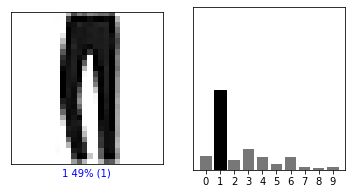

<Figure size 432x288 with 0 Axes>

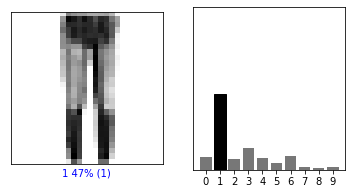

<Figure size 432x288 with 0 Axes>

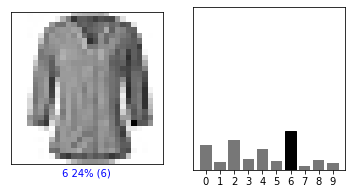

<Figure size 432x288 with 0 Axes>

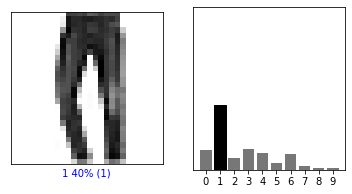

<Figure size 432x288 with 0 Axes>

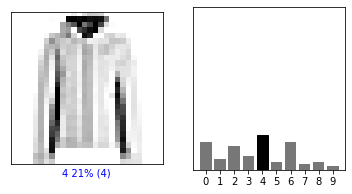

<Figure size 432x288 with 0 Axes>

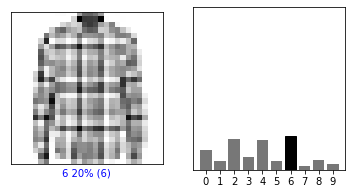

<Figure size 432x288 with 0 Axes>

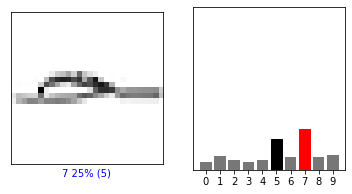

<Figure size 432x288 with 0 Axes>

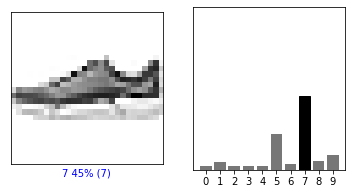

<Figure size 432x288 with 0 Axes>

In [ ]:
# Modelo 3
show_predicted_distributions(predictions3, 10)

El modelo 3, como ya hemos comentado, es el peor por su baja precisión y su gran pérdida,  las probabilidades son muy bajas en todas las imágenes no llegando ni a alcanzar el 50% en ninguna e incluso confundiendo una de . 

In [ ]:
# Modelo 4
show_predicted_distributions(predictions4, 10)

In [ ]:
# Modelo 5
show_predicted_distributions(predictions5, 10)

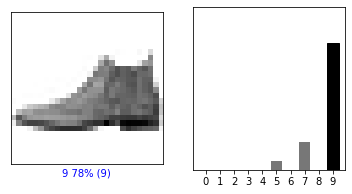

<Figure size 432x288 with 0 Axes>

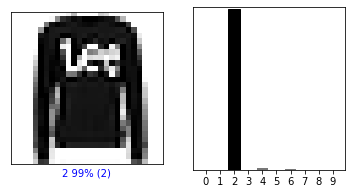

<Figure size 432x288 with 0 Axes>

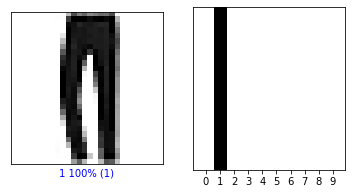

<Figure size 432x288 with 0 Axes>

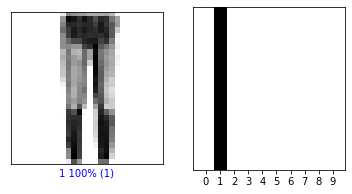

<Figure size 432x288 with 0 Axes>

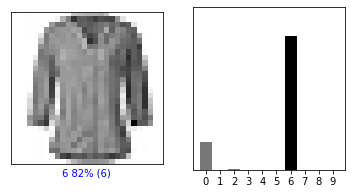

<Figure size 432x288 with 0 Axes>

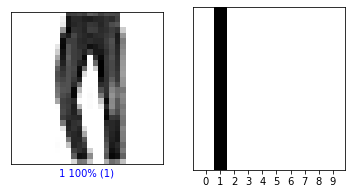

<Figure size 432x288 with 0 Axes>

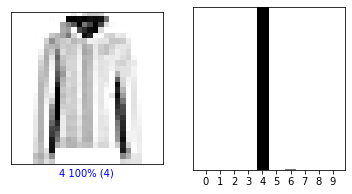

<Figure size 432x288 with 0 Axes>

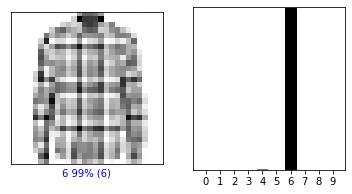

<Figure size 432x288 with 0 Axes>

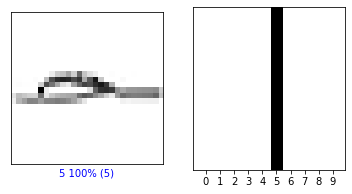

<Figure size 432x288 with 0 Axes>

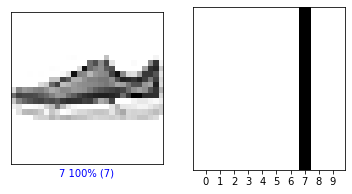

<Figure size 432x288 with 0 Axes>

In [ ]:
# Modelo 6
show_predicted_distributions(predictions6, 10)

Con estas predicciones podemos comprobar que es uno de los mejores modelos ya que acierta casi a la totalidad, salvo la confusión entre camisa y camiseta, lo que es lógico pensar debido a su parecido.

In [ ]:
# Modelo 7
show_predicted_distributions(predictions7, 10)

In [ ]:
# Modelo 8
show_predicted_distributions(predictions8, 10)

###Predicciones

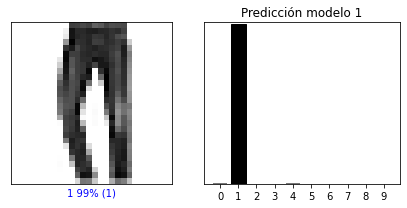

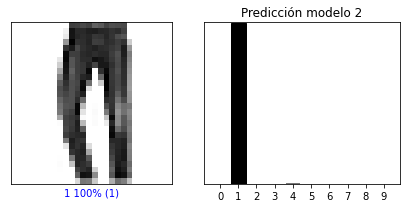

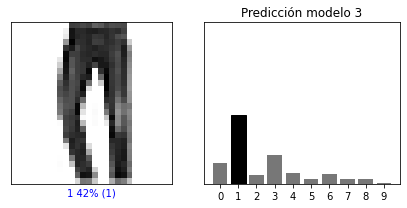

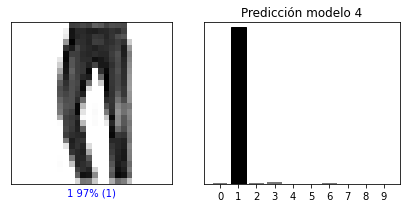

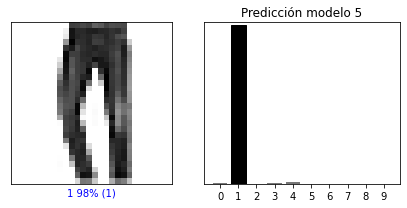

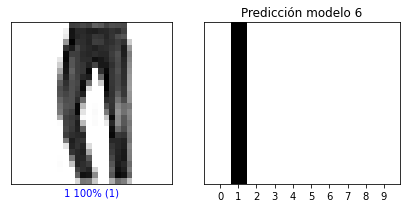

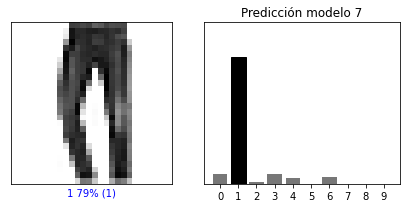

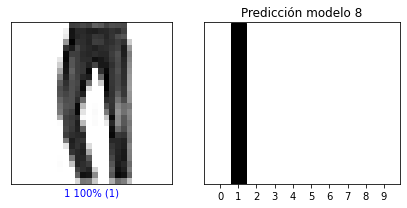

In [ ]:
show_single_predicted_dist(predictions1, 5, title="Predicción modelo 1")
show_single_predicted_dist(predictions2, 5, title="Predicción modelo 2")
show_single_predicted_dist(predictions3, 5, title="Predicción modelo 3")
show_single_predicted_dist(predictions4, 5, title="Predicción modelo 4")
show_single_predicted_dist(predictions5, 5, title="Predicción modelo 5")
show_single_predicted_dist(predictions6, 5, title="Predicción modelo 6")
show_single_predicted_dist(predictions7, 5, title="Predicción modelo 7")
show_single_predicted_dist(predictions8, 5, title="Predicción modelo 8")

Comprobamos que uno de los modelos que mejor predice esta prenda (los pantalones) es el 6 junto con el 8 y el 2. Como ya era de esperar, el peor modelo es el 3, que obtiene un bajo porcentaje de predicción con un 42%. 

### Test error y Test accuracy

Finalmente, como última evaluación de los modelos, vamos a comprobar las métricas Test error y Test accuracy empleando una gráfica de barras horizontales. 

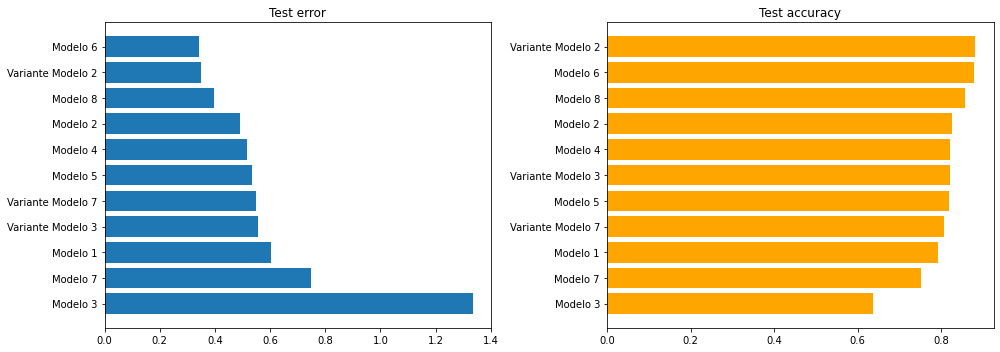

In [ ]:
# Gráfica de barras horizontales con los errores y accuracy de cada modelo (TEST_LOSS, TEST_ACC) 
# Crear función en apartado Funciones para graficar
title = ['Modelo ' + str(i+1) for i in range(8)]
title += ['Variante Modelo 2', 'Variante Modelo 3', 'Variante Modelo 7']

testerror_testacc(TEST_LOSS, TEST_ACC, title, (14, 5))

Realizamos una comparación de los datos de test de las variantes con sus modelos iniciales fijándonos en estos gráficos.
En el modelo 2 teníamos una pérdida de un 48% y una precisión entorno al 83% y en este gráfico observamos como la pérdida baja hasta un 15% en la variante y obtenemos algunos puntos más en la precisión.
Por otro lado en el modelo 7 y su variante comprobamos una mejora de hasta el 20% en la pérdida y más de un 5% en precisión.

# CONCLUSIONES FINALES

Tras haber entrenado y analizado los resultados de 11 modelos en total (8 base y 3 variantes para los casos 2, 3 y 7) podemos concluir que de entre todos ellos los mejores modelos han resultado ser el Modelo 6 y la variante del Modelo 2.

De entre los modelos base, el mejor modelo es el 6 por la baja pérdida frente a los demás modelos (como ya pudimos ver en las gráficas de barras horizontales con los datos de test) y por su alto porcentaje en precisión obteniendo casi un 88%.

De manera similar sucede con el modelo variante 2.

Sin embargo, debemos recordar que la variante del modelo 2 ha sido entrenada utilizando 25 épocas, mientras que el modelo 6 tan solo ha empleado 5, por lo que en vista de los recursos computacionales empleados por ambos modelos, concluimos que el mejor modelo es el Modelo 6.

Por otra parte, también se ha podido comprobar la eficacia del optimizador Adam frente a rmsprop, produciendo el primero mejores resultados.

Finalmente, en el caso de buscar una mayor optimización planteamos entrenar el modelo 6 aumentando las épocas de entrenamiento, ya que de esta manera, aunque se produciría sobre entrenamiento antes, se podrían conseguir resultados mejores y más precisos.  